In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../')
import RandomMatrix as RM

%matplotlib inline
sns.set()

np.random.seed(140)

# Density for Tracy Widom distribution

The Tracy-Widom distribution was defined by Craig A. Tracy and Harold Widom in their paper *On Orthogonal and Symplectic Matrix Ensembles*. It is an important distribution for studying the distribution of the maximum eigenvalue of a Hermite Gaussian Ensemble. The distribution for the Gaussian ensemble with Dyson index $\beta$ is defined by its CDF given below 

$$ F_{\beta}(s) = \lim_{N \rightarrow \infty} F_{N, \beta} \left(2 \sigma \sqrt{N} + \frac{\sigma s}{N^{1/6}} \right)$$

We can take the derivative to find the density of the distribution

$$
\begin{align}
\begin{aligned}
f_{\beta} &= f_{N,B} \left(2 \sigma \sqrt{N} + \frac{\sigma s}{N^{1/6}} \right) \frac{\sigma}{N^{1/6}} \\\\
&= f_{N,B} \left(\frac{s+2\sqrt{N}N^{1/6}}{\frac{N^{1/6}}{\sigma}} \right) \frac{1}{\frac{N^{1/6}}{\sigma}}
\end{aligned}
\end{align}
$$


Recall the formula for the density of linear transformations $f_{aX+b}(s) = f_{X}(\frac{s-b}{a}) \frac{1}{|a|}$. This implies that if $\lambda_{\max}$ is the greatest eigenvalue for GOE, GUE, or GSE and $\sigma$ is the standard deviation of it's off diagonals, then 

$$\frac{N^{1/6}}{\sigma} \lambda_{\max} - 2 \sqrt{N} N^{1/6} \sim \text{Tracy Widom}$$




# Simulation

## GOE

Recall from the first chapter the off diagonal terms in a GOE have standard deviation $\frac{1}{\sqrt{2}}$

In [2]:
trials = 10000
GOE_samples = []
N = 100
for _ in range(trials):
    A = RM.Generate_GOE(N)
    λs, V = np.linalg.eigh(A)
    λ_max = max(λs)
    GOE_samples.append((np.sqrt(2)*λ_max - 2*np.sqrt(N)) * N**(1/6))

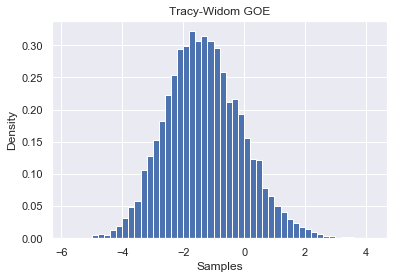

In [3]:
plt.ylabel("Density")
plt.xlabel("Samples")
plt.title("Tracy-Widom GOE")
plt.hist(GOE_samples, bins=50, density=True);

## GUE

Recall from the first chapter that the off diagonal terms of a GUE have standard deviation 1.

In [4]:
trials = 10000
GUE_samples  = []
N = 100
for _ in range(trials):
    A = RM.Generate_GUE(N)
    λs, V = np.linalg.eigh(A)
    λ_max = max(λs)
    GUE_samples.append((λ_max - 2 * np.sqrt(N)) * N**(1/6))

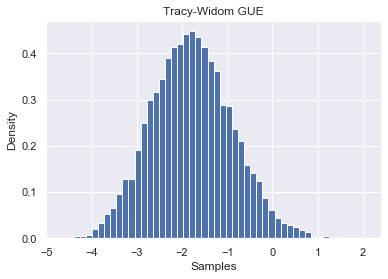

In [5]:
plt.ylabel("Density")
plt.xlabel("Samples")
plt.title("Tracy-Widom GUE")
plt.hist(GUE_samples, bins=50, density=True);